In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

In [4]:
loss_path = "../../data/plot_data/human_cells/tuner_full_losses.csv"
loss_df = pd.read_csv(loss_path)

In [13]:
loss_df.sort_values("reconstruction_loss")

,loss,reconstruction_loss,divergence_loss,epochs,batch_size,save_on,n_emb,n_lay,lr,lrelu_slope,dataset,dataset_size,join,refresh_data_on,reload_dataset_aux,main_folder,losses_file
114,80.685632,43.653421,37.032210,128.0,128.0,128.0,46.0,5.0,0.0004,0.01,./data/samples/human_cells/,65536,inter,8,False,./data/tuner/full/runs/94,./data/tuner/full/runs/94/losses.csv
104,74.397941,43.968601,30.429340,128.0,128.0,128.0,32.0,5.0,0.0004,0.01,./data/samples/human_cells/,65536,inter,8,False,./data/tuner/full/runs/85,./data/tuner/full/runs/85/losses.csv
5,89.705751,43.998651,45.707100,128.0,128.0,128.0,64.0,5.0,0.0004,0.01,./data/samples/human_cells/,65536,inter,8,False,./data/tuner/full/runs/103,./data/tuner/full/runs/103/losses.csv
22,129.645155,44.185302,85.459852,128.0,128.0,128.0,128.0,4.0,0.0004,0.01,./data/samples/human_cells/,65536,inter,8,False,./data/tuner/full/runs/120,./data/tuner/full/runs/120/losses.csv
94,70.829985,44.567693,26.262292,128.0,128.0,128.0,24.0,5.0,0.0004,0.01,./data/samples/human_cells/,65536,inter,8,False,./data/tuner/full/runs/76,./data/tuner/full/runs/76/losses.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1222.816701,1206.812215,16.004489,128.0,128.0,128.0,32.0,16.0,0.0004,0.01,./data/samples/human_cells/,65536,inter,8,False,./data/tuner/full/runs/89,./data/tuner/full/runs/89/losses.csv
109,1222.816701,1206.812215,16.004489,128.0,128.0,128.0,32.0,16.0,0.0004,0.01,./data/samples/human_cells/,65536,inter,8,False,./data/tuner/full/runs/89,./data/tuner/full/runs/89/losses.csv
31,NaN,NaN,NaN,128.0,128.0,128.0,2.0,12.0,0.0004,0.01,./data/samples/human_cells/,65536,inter,8,False,./data/tuner/full/runs/16,./data/tuner/full/runs/16/losses.csv
49,NaN,NaN,NaN,128.0,128.0,128.0,4.0,12.0,0.0004,0.01,./data/samples/human_cells/,65536,inter,8,False,./data/tuner/full/runs/34,./data/tuner/full/runs/34/losses.csv


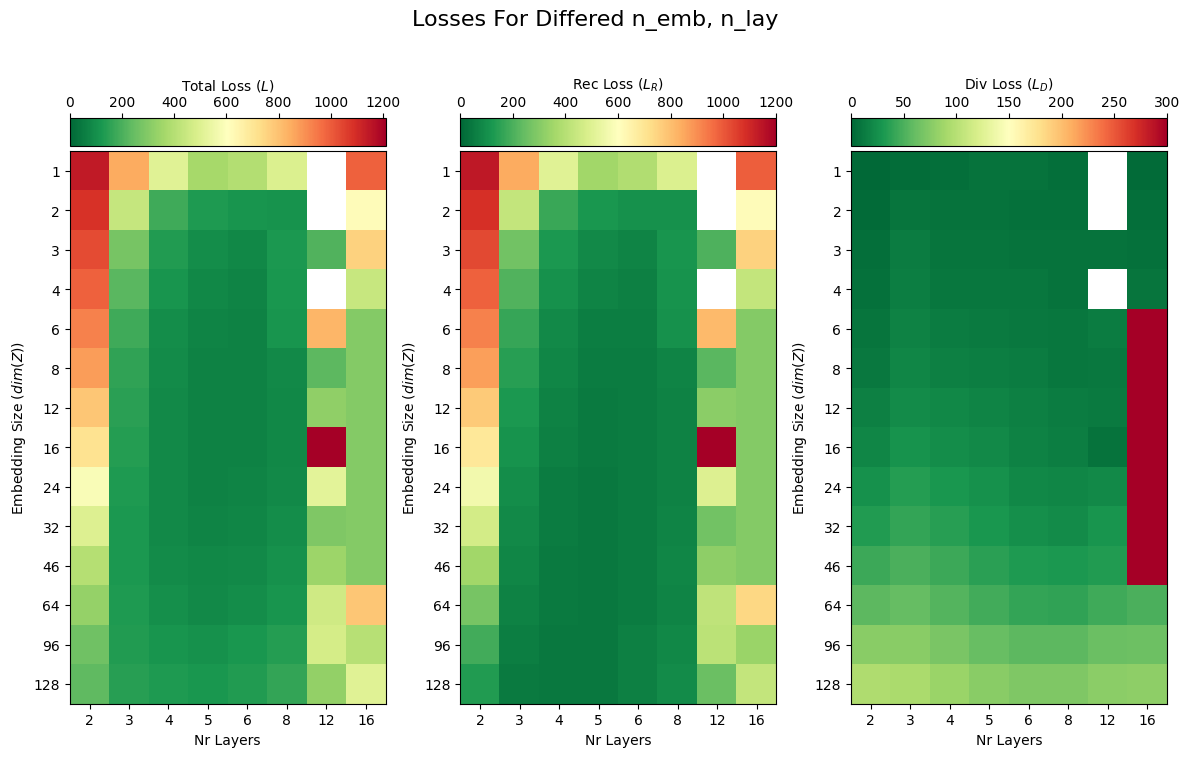

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,8))

n_embs = sorted(map(int, loss_df['n_emb'].unique()))
n_lays = sorted(map(int, loss_df['n_lay'].unique()))

n_n_emb = len(n_embs)
n_n_lay = len(n_lays)

losses =   np.ones((n_n_emb, n_n_lay)) * 300
r_losses = np.ones((n_n_emb, n_n_lay)) * 300
d_losses = np.ones((n_n_emb, n_n_lay)) * 300

for i, n_emb in enumerate(n_embs):
    i_df = loss_df[loss_df['n_emb'] == n_emb]
    for j, n_lay in enumerate(n_lays):
        ij_df = i_df[i_df['n_lay'] == n_lay]

        if len(ij_df) == 1:
            losses[i,j] = ij_df['loss'].mean()
            r_losses[i,j] = ij_df['reconstruction_loss'].mean()
            d_losses[i,j] = ij_df['divergence_loss'].mean()

def plot(ax, losses, loss_type):
    im = ax.imshow(losses, cmap='RdYlGn_r', vmin=0)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="5%", pad=0.05)     
    cbar = plt.colorbar(im, cax=cax, location="top")
    cbar.set_label(loss_type)

    ax.set_yticks(range(n_n_emb), n_embs)
    ax.set_xticks(range(n_n_lay), n_lays)
    ax.set_xlabel("Nr Layers")
    ax.set_ylabel("Embedding Size ($dim(Z)$)")

plot(ax1, losses, "Total Loss ($L$)")
plot(ax2, r_losses, "Rec Loss ($L_R$)")
plot(ax3, d_losses, "Div Loss ($L_D$)")

fig.suptitle("Losses For Differed n_emb, n_lay", fontsize=16)

fig.tight_layout()
plt.savefig("n_emb vs n_lay Runs Comparison.png", dpi=600)